Saving 3. Predict Disease Outcome Based on Genetic and Clinical Data.csv to 3. Predict Disease Outcome Based on Genetic and Clinical Data (3).csv
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



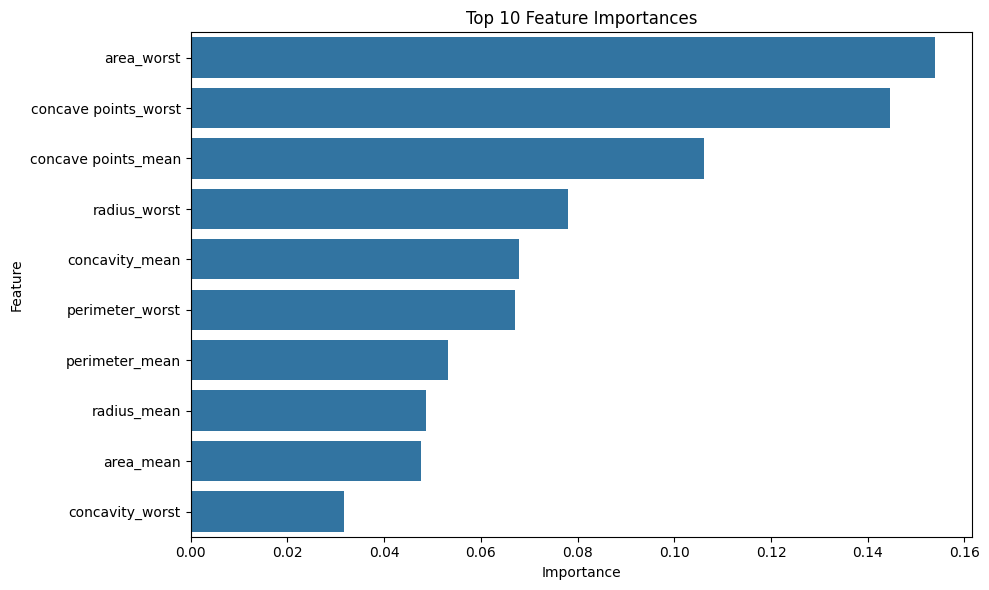

In [7]:
# Step 1: Install and import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 3: Load dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 4: Clean dataset
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')  # drop if they exist
df.dropna(inplace=True)  # drop any rows with missing values

# Step 5: Encode target variable
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])  # M=1, B=0

# Step 6: Define features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 7: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Plot top 10 feature importances
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()
